In [4]:


import numpy as np
import matplotlib.pyplot as plt

###############################################################################
# 1) Explanation of Each Optimizer 
###############################################################################


# **1. Stochastic Gradient Descent (SGD)**

**Formula** (in its simplest form, without momentum):

\[
\theta \leftarrow \theta - \eta \, \nabla_\theta f(\theta)
\]

- \(\theta\) represents the parameters (e.g., \((x, y)\) in our example).
- \(\eta\) is the learning rate.
- \(\nabla_\theta f(\theta)\) is the gradient of \(f\) w.r.t. parameters.

---

# **2. RMSProp**

RMSProp keeps a moving average of the squared gradient:

1. Accumulate squared gradients:
   \[
   r \leftarrow \alpha \, r + (1 - \alpha) \, \nabla_\theta f(\theta)^2
   \]

2. Update parameters:
   \[
   \theta \leftarrow \theta - \frac{\eta}{\sqrt{r + \epsilon}} \, \nabla_\theta f(\theta)
   \]

Here:
- \( r \) is the running average of squared gradients.
- \(\alpha\) is a decay constant (e.g., 0.9).
- \(\epsilon\) is a small constant to avoid division by zero (e.g., \(10^{-8}\)).

---

# **3. Adam**

Adam combines ideas from momentum and RMSProp:

1. Update biased first moment estimate:
   \[
   m \leftarrow \beta_1 m + (1 - \beta_1)\,\nabla_\theta f(\theta)
   \]

2. Update biased second moment estimate:
   \[
   v \leftarrow \beta_2 v + (1 - \beta_2)\,\nabla_\theta f(\theta)^2
   \]

3. Correct bias in the moment estimates:
   \[
   \hat{m} = \frac{m}{1 - \beta_1^t}, \quad
   \hat{v} = \frac{v}{1 - \beta_2^t}
   \]

4. Update parameters:
   \[
   \theta \leftarrow \theta - \frac{\eta}{\sqrt{\hat{v}} + \epsilon} \, \hat{m}
   \]

Typical defaults:
- \(\beta_1 = 0.9\)
- \(\beta_2 = 0.999\)
- \(\epsilon = 10^{-8}\)


Running SGD ...
Running RMSProp ...
Running Adam ...


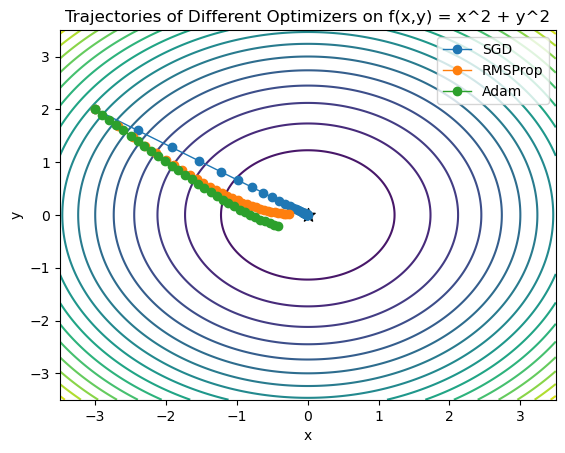

In [5]:
###############################################################################
# 2) Demonstration on a Simple 2D Function
###############################################################################

# We want to minimize f(x, y) = x^2 + y^2.
# Gradient is: ∂f/∂x = 2x, ∂f/∂y = 2y.
# The global minimum is at (0, 0).

def f(params):
    x, y = params
    return x**2 + y**2

def grad_f(params):
    x, y = params
    return np.array([2*x, 2*y], dtype=np.float32)

def sgd_update(params, grad, lr):
    # θ <- θ - lr * grad
    return params - lr * grad

class RMSProp:
    def __init__(self, lr=0.1, alpha=0.9, eps=1e-8):
        self.lr = lr
        self.alpha = alpha
        self.eps = eps
        self.r = 0.0
        
    def update(self, params, grad):
        # r <- alpha * r + (1 - alpha)* grad^2
        self.r = self.alpha * self.r + (1 - self.alpha) * (grad**2)
        
        # params <- params - lr / sqrt(r + eps) * grad
        return params - self.lr / (np.sqrt(self.r + self.eps)) * grad

class Adam:
    def __init__(self, lr=0.1, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.eps = eps
        self.m = 0.0
        self.v = 0.0
        self.t = 0  # time step
        
    def update(self, params, grad):
        self.t += 1
        # m <- beta1*m + (1-beta1)*grad
        self.m = self.beta1 * self.m + (1 - self.beta1) * grad
        # v <- beta2*v + (1-beta2)*grad^2
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grad**2)
        
        # bias-corrected first moment
        m_hat = self.m / (1 - self.beta1**self.t)
        # bias-corrected second moment
        v_hat = self.v / (1 - self.beta2**self.t)
        
        # params <- params - lr * m_hat / (sqrt(v_hat) + eps)
        return params - self.lr * m_hat / (np.sqrt(v_hat) + self.eps)


def run_optimization(optimizer_name, lr=0.1, steps=30):
    # Initialize parameters
    params = np.array([-3.0, 2.0], dtype=np.float32)  # arbitrary starting point
    trajectory = [params.copy()]
    
    if optimizer_name == "SGD":
        for _ in range(steps):
            g = grad_f(params)
            params = sgd_update(params, g, lr=lr)
            trajectory.append(params.copy())
    elif optimizer_name == "RMSProp":
        opt = RMSProp(lr=lr, alpha=0.9, eps=1e-8)
        for _ in range(steps):
            g = grad_f(params)
            params = opt.update(params, g)
            trajectory.append(params.copy())
    elif optimizer_name == "Adam":
        opt = Adam(lr=lr, beta1=0.9, beta2=0.999, eps=1e-8)
        for _ in range(steps):
            g = grad_f(params)
            params = opt.update(params, g)
            trajectory.append(params.copy())
    else:
        raise ValueError("Unknown optimizer!")
        
    return np.array(trajectory)


###############################################################################
# 3) Plotting the Trajectories
###############################################################################

def plot_contours_and_paths(paths_dict, steps=30):
    """
    paths_dict is a dictionary like:
    {
        'SGD': np.array([...]),
        'RMSProp': np.array([...]),
        'Adam': np.array([...])
    }
    each array shape is (steps+1, 2).
    """
    # Create a contour plot for f(x, y) = x^2 + y^2
    x_vals = np.linspace(-3.5, 3.5, 200)
    y_vals = np.linspace(-3.5, 3.5, 200)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = X**2 + Y**2
    
    plt.figure()
    # Contour
    plt.contour(X, Y, Z, levels=20)
    
    # Plot each path
    for label, coords in paths_dict.items():
        plt.plot(coords[:, 0], coords[:, 1], marker='o', label=label, linewidth=1)
        
    plt.scatter([0], [0], color='k', marker='*', s=100)  # minimum point
    plt.xlim([-3.5, 3.5])
    plt.ylim([-3.5, 3.5])
    plt.title("Trajectories of Different Optimizers on f(x,y) = x^2 + y^2")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()


###############################################################################
# Run the demonstration
###############################################################################
optimizers = ["SGD", "RMSProp", "Adam"]

paths = {}
for opt in optimizers:
    print(f"Running {opt} ...")
    traj = run_optimization(opt, lr=0.1, steps=30)
    paths[opt] = traj

plot_contours_and_paths(paths, steps=30)
